In [162]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from numba import njit, prange, jit
import json

In [163]:
song_graph = np.genfromtxt('diffs.csv', delimiter=',', dtype='int16')

In [164]:
song_graph

array([[  -1,    0,    1, ..., 5832, 5833, 5834],
       [   0,    0, -314, ...,  -93, -139, -152],
       [   1,    0,    0, ...,  221,  175,  162],
       ...,
       [5832,    0,    0, ...,    0,  -46,  -59],
       [5833,    0,    0, ...,    0,    0,  -13],
       [5834,    0,    0, ...,    0,    0,    0]], dtype=int16)

In [165]:
num_songs = song_graph.shape[0] - 1
sg = np.zeros((num_songs, num_songs),dtype="int32")
for i in range(num_songs):
    for j in range(i, num_songs):
        dist = song_graph[i+1][j+1]
        sg[i][j] = dist
        sg[j][i] = -1 * dist
    print(i, end='\r')

In [166]:
sg.shape

(5835, 5835)

In [167]:
# @njit(parallel=True)
def test_triangle():
    for i in prange(num_songs):
        for j in range(num_songs):
            for k in range(num_songs):
                if sg[i][j] < 0 and sg[j][k] < 0 and sg[i][k] > 0:
                    print(i,",", j,",", k)
                    print(sg[i][j], sg[j][k], sg[i][k])
                    return;

In [168]:
test_triangle()

0 , 281 , 37
-202 -3 323


In [169]:
type(sg[0][0])

numpy.int32

In [170]:
k = 4

In [171]:
W = np.zeros(sg.shape)
D = np.zeros(sg.shape)
for i in range(num_songs):
    D[i][i] = sum(abs(sg[i]))
    for j in range(num_songs):
        W[i][j] = abs(sg[i][j])
    print(i, end="\r")

In [172]:
counts = {}
for i in range(num_songs):
    for j in range(num_songs):
        if W[i][j] in counts:
            counts[W[i][j]] += 1
        else:
            counts[W[i][j]] = 1

2405.0


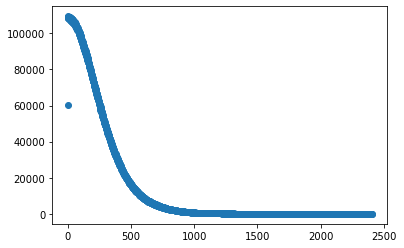

In [173]:
counts.keys()
plt.scatter(counts.keys(), counts.values())
print(max(counts.keys()))

In [174]:
L = D - W

In [175]:
L

array([[ 1.063409e+06, -3.140000e+02, -1.560000e+02, ..., -9.300000e+01,
        -1.390000e+02, -1.520000e+02],
       [-3.140000e+02,  1.372935e+06, -1.580000e+02, ..., -2.210000e+02,
        -1.750000e+02, -1.620000e+02],
       [-1.560000e+02, -1.580000e+02,  9.050450e+05, ..., -6.300000e+01,
        -1.700000e+01, -4.000000e+00],
       ...,
       [-9.300000e+01, -2.210000e+02, -6.300000e+01, ...,  9.002800e+05,
        -4.600000e+01, -5.900000e+01],
       [-1.390000e+02, -1.750000e+02, -1.700000e+01, ..., -4.600000e+01,
         8.937040e+05, -1.300000e+01],
       [-1.520000e+02, -1.620000e+02, -4.000000e+00, ..., -5.900000e+01,
        -1.300000e+01,  9.017410e+05]])

In [176]:
ed = np.linalg.eigh(L)

In [177]:
type(ed[1][0][0])

numpy.float64

In [178]:
evals = ed[0] # sorted eigenvalues
evecs = ed[1]
k = 10
U = np.zeros((num_songs,k))
for i in range(num_songs):
    for j in range(k):
        U[i][j] = evecs[i][j]
print(evecs.shape)
print(U.shape)

(5835, 5835)
(5835, 10)


In [179]:
km = KMeans(n_clusters=k).fit(U)

In [180]:
labels = km.labels_
for i in labels:
    print(i,end=", ")

0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [181]:
SKW = np.zeros(W.shape)
for i in range(num_songs):
    print(i, end="\r")
    for j in range(num_songs):
        if(W[i][j] != 0):
            SKW[i][j] = 1.0/W[i][j]

In [183]:
max([max(W[i]) for i in range(num_songs)])

2405.0

In [182]:
delta = 1
SKW2 = np.exp(-W**0.5)

In [ ]:
SKW2

In [123]:
def get_average_clustered_distance(counts, W, k):
    sum_pairs = 0
    total_pairs = 0
    for i in range(k):
        print("cluster {}".format(k), end="\r")
        cluster = counts[i]
        num = len(cluster)
        num_pairs = (num-1) * (num)
        total_pairs += num_pairs
        for i in cluster:
            for j in cluster:
                sum_pairs += W[i][j]
    return sum_pairs/total_pairs

In [124]:
def run_clustering(k, W):
    sc = SpectralClustering(n_clusters=k,affinity='precomputed',eigen_solver='amg').fit(SKW)
    labels = sc.labels_
    
    print("labels generated")
    
    counts = {}
    for song, i in enumerate(labels):
        if i in counts:
            counts[i].append(song)
        else:
            counts[i] = [song]

    return (get_average_clustered_distance(counts, W, k), labels)

In [125]:
def find_elbow(): # too slow
    x = []
    y = []
    k_cluster = []
    for k in prange(1,1000,20):
        print("k = {}".format(k), end="\r")
        a = run_clustering(k, W)
        k_cluster.append((k,a))
        x.append(k)
        y.append(a)
        plt.scatter(x,y)
        plt.show()
    return k_cluster

In [150]:
k = 100
weight, labels = run_clustering(k, W)

labels generated


In [151]:
cluster_sizes = np.asarray([sum(labels == i) for i in range(k)])
print(np.std(cluster_sizes)/(num_songs/k))
print(weight)

0.825222165641037
26.88192326159408


In [157]:
sum(sum(W))/(num_songs * (num_songs-1))# - run_clustering(1,W) # = 0.0

218.914423647213

In [152]:
f = open("songs.json")
all_songs = json.load(f)
f.close()

In [153]:
song_clusters = {}
for i in range(num_songs):
    label = labels[i]
    song_name = str(i) + ": " + all_songs[i]['artist'] + "/" + all_songs[i]['song']
    if label in song_clusters:
        song_clusters[label].append(song_name)
    else:
        song_clusters[label] = [song_name]

In [154]:
song_clusters

{56: ['0: 10cc/the-things-we-do-for-love',
  '19: 5-seconds-of-summer/end-up-here',
  '28: 5-seconds-of-summer/jet-black-heart',
  '73: a-rocket-to-the-moon/like-we-used-to',
  '96: ace-of-base/the-sign',
  '132: against-the-current/guessing',
  '134: agnes-obel/riverside',
  '151: ajr/wow-im-not-crazy',
  '258: alt-j/something-good',
  '305: andy-grammer/fine-by-me',
  '350: arctic-monkeys/secret-door',
  '447: avril-lavigne/when-youre-gone',
  '460: backstreet-boys/drowning',
  '468: bad-things/caught-inside',
  '485: barry-mcguire/eve-of-destruction',
  '495: bastille/icarus',
  '521: beach-bunny/prom-queen',
  '659: birdy/all-about-you-two',
  '783: boys-like-girls/the-great-escape',
  '901: busted/meet-you-there',
  '915: cage-the-elephant/telescope',
  '1042: charlie-worsham/could-it-be',
  '1177: coldplay/magic-three',
  '1550: ed-sheeran/kiss-me',
  '1778: first-aid-kit/emmylou',
  '1817: florence-and-the-machine/never-let-me-go',
  '1847: foreigner/waiting-girl-like',
  '1892:

In [135]:
sg[611][4904]

2

In [156]:
sg[5287][3273]

34